---
title: "Data Exploration"
format: html
execute:
    echo: false
link-external-newwindow: true
bibliography: reference.bib
website:
  back-to-top-navigation: true
---

## Introduction
In this section, I delve into exploring the datasets I previously gathered and cleaned. Exploratory Data Analysis (EDA) is the crucial first step in the data analysis process, where we unravel the hidden stories and patterns within our datasets. It involves a comprehensive examination of data, employing various statistical and visualization techniques to understand its structure, relationships, and anomalies. EDA not only uncovers valuable insights but also serves as the foundation for informed decision-making in data-driven projects. I will work through each of the 6 datasets I gathered and cleaned from the previous [Data Gathering](data_gathering.ipynb) and [Data Cleaning](data_cleaning.ipynb) tabs, applying different EDA methods using Matplotlib, Seaborn and Pandas.

### General EDA Steps

I will walk through each of the below topics for my datasets, being sure to complete thorough and effective EDA.

**Data Understanding:** To effectively tackle our project's objectives, we must first immerse ourselves in the dataset. We'll explore its features, understand their data types, and investigate potential relationships that are crucial for our analysis.

**Descriptive Statistics:** Let's start by quantifying the data's central tendencies and spread for numerical variables, giving us insights into the dataset's overall distribution. For categorical variables, we'll create frequency distributions and visualizations to grasp their distribution patterns.

**Data Visualization:** We'll harness the power of data visualization to make sense of complex data. Through histograms, scatter plots, and more, we'll gain a visual perspective on data distribution, variable relationships, and potential trends.

**Correlation Analysis:** By scrutinizing correlations between variables, we'll uncover valuable insights. Heatmaps and scatter plots will help us identify positive, negative, or negligible correlations, steering us towards deeper analyses.

**Hypothesis Generation:** Building on our initial observations, we'll refine our hypotheses and research questions, ensuring they align with the emerging insights from the data.

**Data Grouping and Segmentation:** When applicable, we'll divide the data into meaningful segments or groups. This approach allows us to explore specific subgroups, revealing insights that might not be apparent in the overall dataset.

**Identifying Outliers:** We'll pay close attention to outliers, which can indicate data quality issues or hold intriguing stories within the dataset. Uncovering these anomalies is crucial to a comprehensive understanding of the data.

### Data Meanings

Many of the datasets used contain audio features of songs/artists. Below I have defined what each column means and represents, so you can get a clearer understanding of further data analysis that is to come.

**Duration**
The length of the song in milliseconds.

**Popularity**
A 0-to-100 score that ranks how popular an artist/track is relative to other artists/tracks on Spotify.

**Acousticness**
A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

**Danceability**
Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

**Energy**
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

**Instrumentalness**
Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

**Key**
The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

**Liveness**
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

**Loudness**
The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

**Mode**
Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

**Speechiness**
Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

**Tempo**
The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

**Valence**
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).


## News API

I've collected a rich dataset from the News API, focusing on articles related to Spotify. This dataset is a treasure trove of information about the latest developments, trends, and news surrounding the music streaming platform. To distill the essence of these articles, I decided to create a captivating word cloud. By analyzing the titles and descriptions of each article, this word cloud visually represents the most frequently occurring words, offering a quick and insightful glimpse into the key themes and topics that dominate the Spotify news landscape. It's a fascinating way to showcase the highlights and trending subjects within this dynamic and ever-evolving industry.

The generated Spotify-themed word cloud below provides a visually captivating snapshot of the key themes and topics present in the collected articles. As expected, the word 'Spotify' takes center stage, reaffirming its central role in the context of these articles. The prominence of terms like 'music,' 'new,' and 'AI' suggests that the articles likely revolve around discussions regarding innovative developments, trends, and technologies in the music industry. The word 'week' may indicate a focus on weekly updates or happenings within Spotify, while 'Apple' hints at possible comparisons or interactions between the two major players in the music streaming industry.

Overall, this word cloud offers a quick and engaging overview of the most significant terms within the dataset, providing a valuable starting point for understanding the core topics and trends in Spotify-related news.


In [14]:
## Spotify News API
# Import modules
import requests
import json
import re
import pandas as pd
import numpy as np
import sys
from sklearn.feature_extraction.text import CountVectorizer


In [15]:
# Redirect standard output to a dummy variable to suppress it
original_stdout = sys.stdout
sys.stdout = open('dummy_output.txt', 'w')

baseURL = "https://newsapi.org/v2/everything?"
total_requests=2
verbose=True

# THIS CODE WILL NOT WORK UNLESS YOU INSERT YOUR API KEY IN THE NEXT LINE
API_KEY = '912dd6a8705a460bb55f2d234124efc4'
TOPIC='spotify'

# Only English articles will be requested
URLpost = {'apiKey': API_KEY,
            'q': '+'+TOPIC,
            'sortBy': 'relevancy',
            'totalRequests': 1,
            'language': 'en'}

print(baseURL)
# print(URLpost)

#GET DATA FROM API
response = requests.get(baseURL, URLpost) #request data from the server
# print(response.url);  
response = response.json() #extract txt data from request into json

#print(json.dumps(response, indent=2))

# GET TIMESTAMP FOR PULL REQUEST
from datetime import datetime
timestamp = datetime.now().strftime("%Y-%m-%d-H%H-M%M-S%S")

# SAVE TO FILE 
with open(timestamp+'-newapi-raw-data.json', 'w') as outfile:
    json.dump(response, outfile, indent=4)

# String cleaner function
def string_cleaner(input_string):
    try: 
        out=re.sub(r"""
                    [,.;@#?!&$-]+  # Accept one or more copies of punctuation
                    \ *           # plus zero or more copies of a space,
                    """,
                    " ",          # and replace it with a single space
                    input_string, flags=re.VERBOSE)

        #REPLACE SELECT CHARACTERS WITH NOTHING
        out = re.sub('[’.]+', '', input_string)

        #ELIMINATE DUPLICATE WHITESPACES USING WILDCARDS
        out = re.sub(r'\s+', ' ', out)

        #CONVERT TO LOWER CASE
        out=out.lower()
    except:
        print("ERROR")
        out=''
    return out

# Clean the pulled Spotify text
article_list=response['articles']   #list of dictionaries for each article
article_keys=article_list[0].keys()
print("AVAILABLE KEYS:")
print(article_keys)
index=0
cleaned_data3=[];  
for article in article_list:
    tmp=[]
    if(verbose):
        print("#------------------------------------------")
        print("#",index)
        print("#------------------------------------------")

    for key in article_keys:
        if(verbose):
            print("----------------")
            print(key)
            print(article[key])
            print("----------------")

        if(key=='source'):
            src=string_cleaner(article[key]['name'])
            tmp.append(src) 

        if(key=='author'):
            author=string_cleaner(article[key])
            #ERROR CHECK (SOMETIMES AUTHOR IS SAME AS PUBLICATION)
            if(src in author): 
                print(" AUTHOR ERROR:",author);author='NA'
            tmp.append(author)

        if(key=='title'):
            tmp.append(string_cleaner(article[key]))

        if(key=='description'):
             tmp.append(string_cleaner(article[key]))

        if(key=='content'):
             tmp.append(string_cleaner(article[key]))

        if(key=='publishedAt'):
            #DEFINE DATA PATERN FOR RE TO CHECK  .* --> wildcard
            ref = re.compile('.*-.*-.*T.*:.*:.*Z')
            date=article[key]
            if(not ref.match(date)):
                print(" DATE ERROR:",date); date="NA"
            tmp.append(date)

    cleaned_data3.append(tmp)
    index+=1

# Restore the standard output
sys.stdout = original_stdout

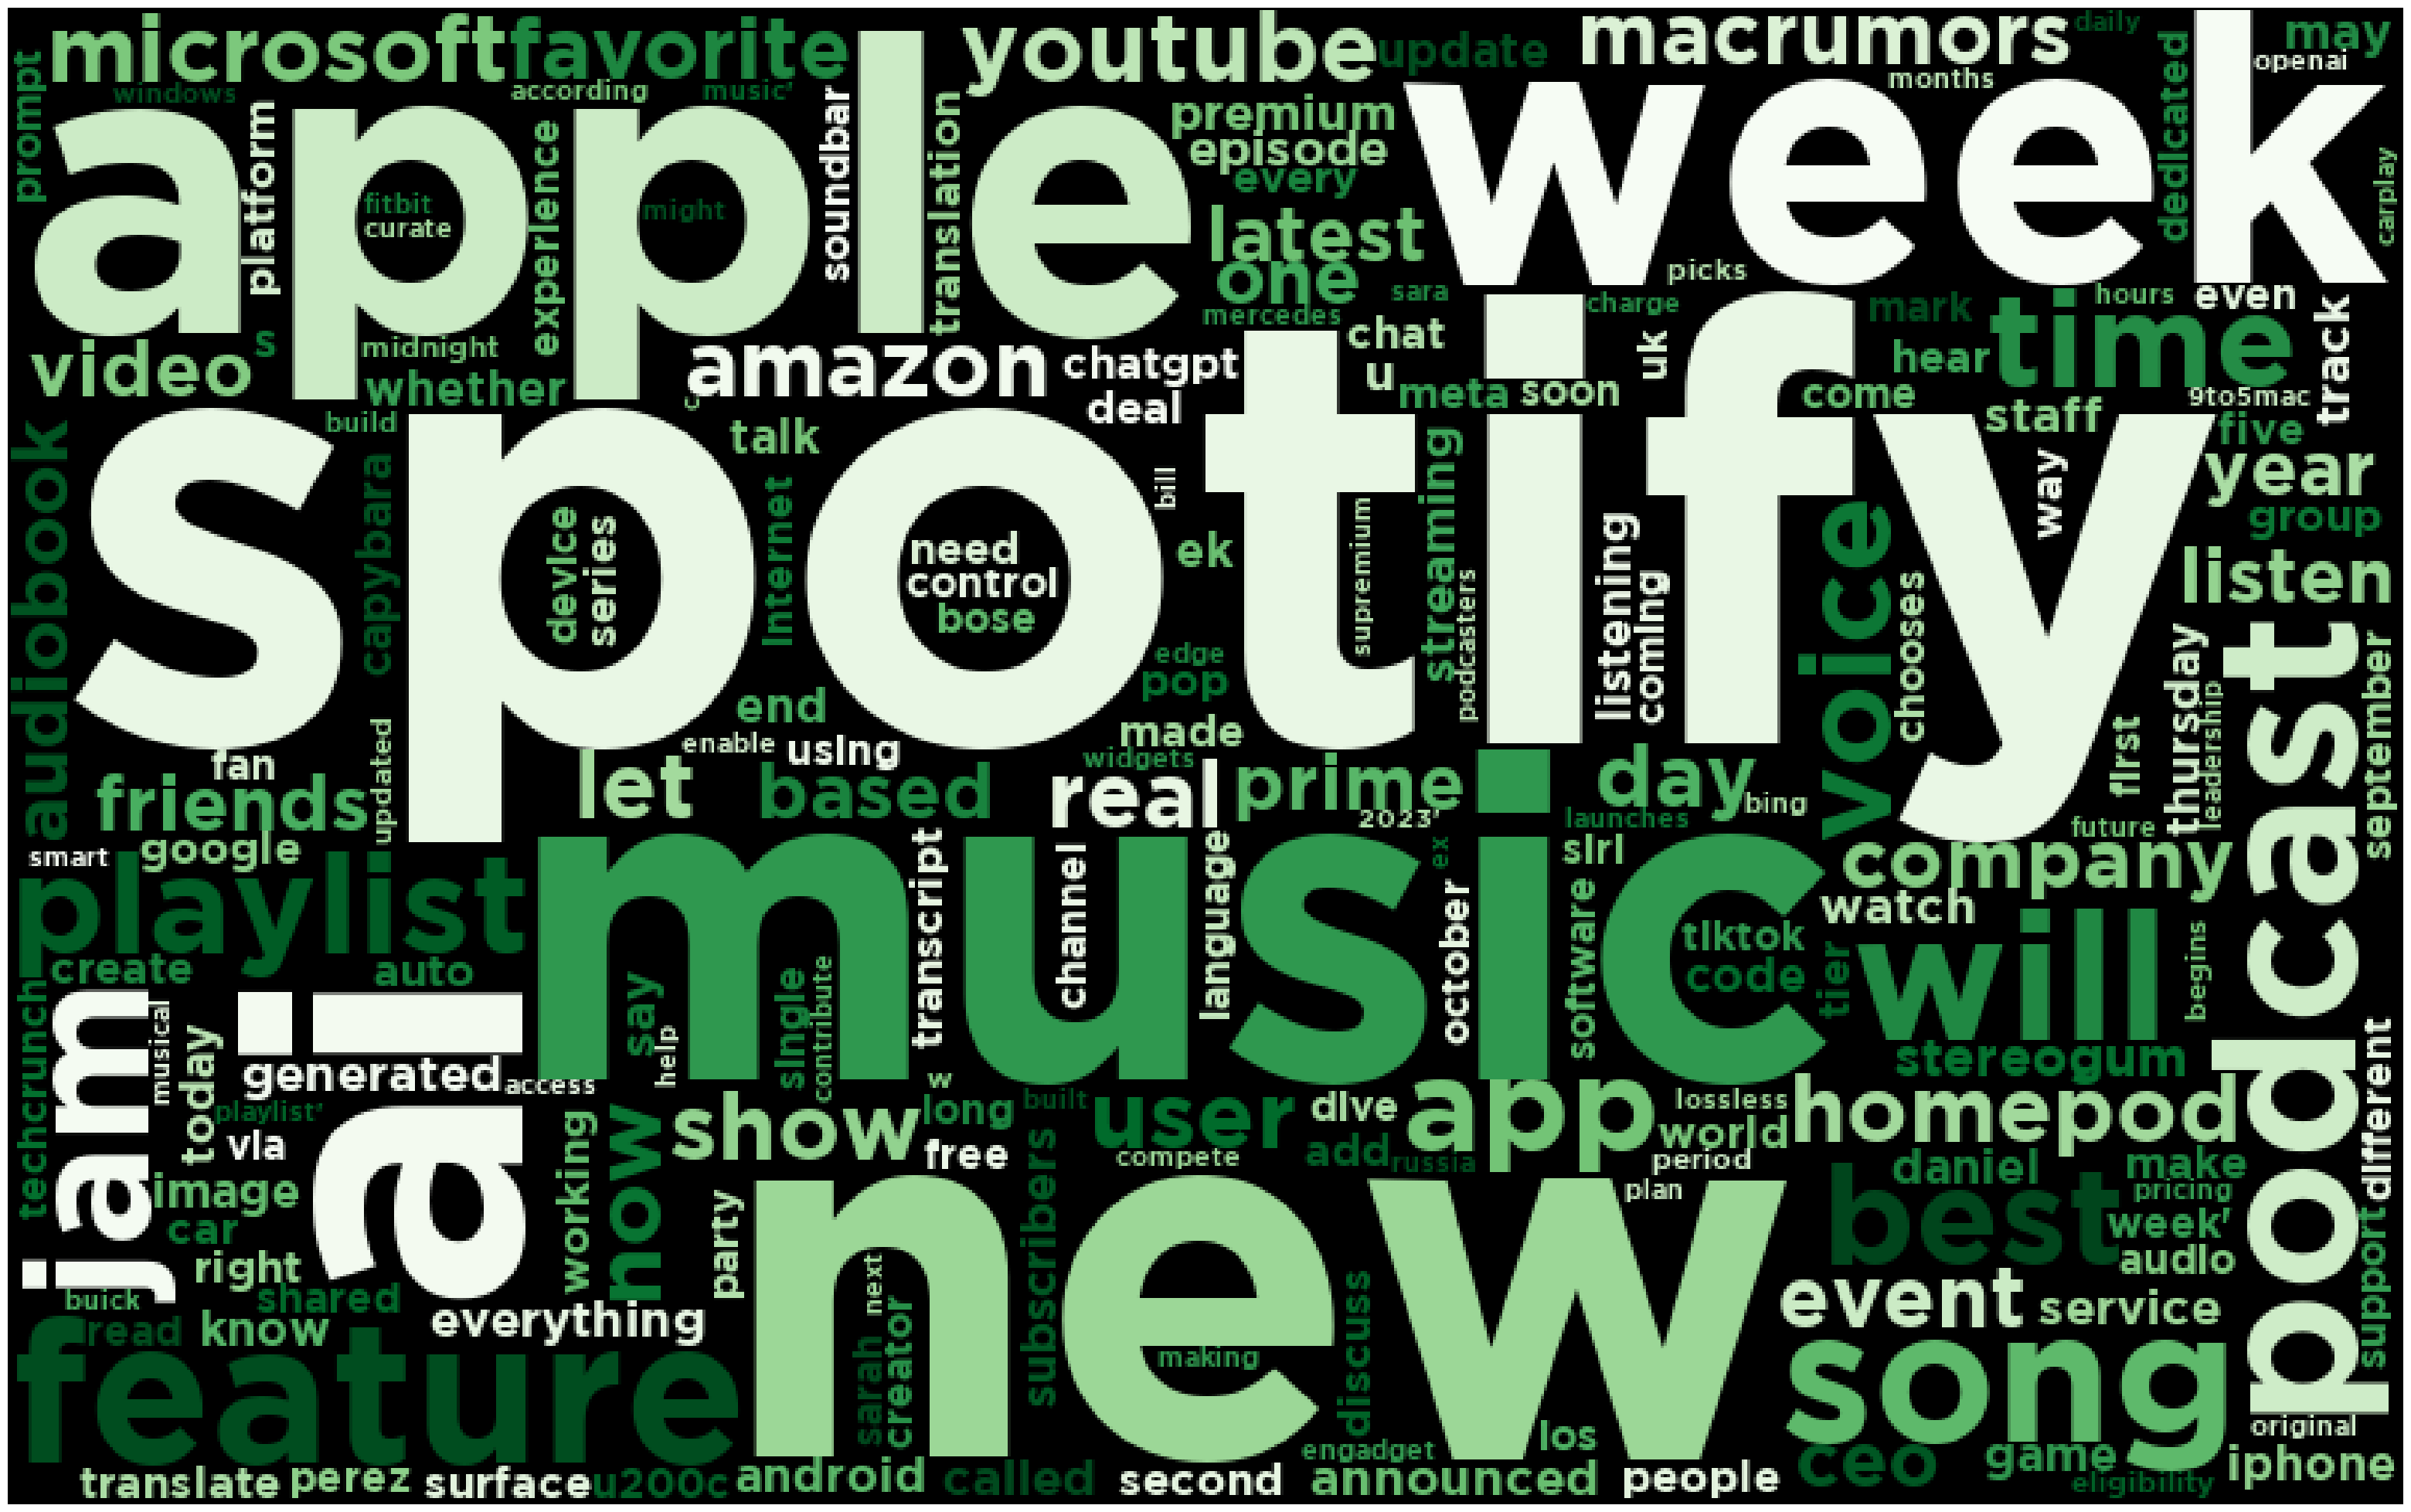

In [16]:

df3 = pd.DataFrame(cleaned_data3)
title = str(np.array(df3[2]))
description = str(np.array(df3[3]))
spotify = title + description  

# Create word cloud for initial analysis
# MODIFIED FROM 
# https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5
def generate_word_cloud(my_text):
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    # exit()
    # Import package
    # Define a function to plot word cloud
    def plot_cloud(wordcloud):
        # Set figure size
        plt.figure(figsize=(40, 30))
        # Display image
        plt.imshow(wordcloud) 
        # No axis details
        plt.axis("off");

    # Generate word cloud
    wordcloud = WordCloud(
        width = 800,
        height = 500, 
        random_state=1, 
        background_color='black', 
        colormap='Greens', 
        collocations=False,
        stopwords = STOPWORDS,
        font_path='../../data/raw_data/news_api/GothamBold.ttf').generate(my_text)
    plot_cloud(wordcloud)
    plt.show()

generate_word_cloud(spotify)

## Electronic Dance Music Subgenres

### Data Understanding



In [147]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

edm_subgenres = pd.read_csv('../../data/clean_data/edm_subgenres/edm_subgenres.csv')

edm_subgenres['duration_ms'] = (edm_subgenres['duration_ms']/1000)/60
edm_subgenres = edm_subgenres.rename(columns={'duration_ms':'duration_mins'})


In [148]:
edm_subgenres.dtypes

artist_name          object
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_mins       float64
time_signature      float64
genre                object
dtype: object

In [149]:
edm_subgenres.shape

(20607, 15)


### Descriptive Statistics
Below are the descriptive statistics of the dataset. As this dataset is a combination of 5 edm subgenres, it would be interesting to compare these statistics across the genres.

In [150]:
edm_subgenres.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
danceability,20607.0,0.645416,0.142001,0.000000,0.552000,0.658000,0.761000,0.989000
energy,20607.0,0.822341,0.151667,0.001370,0.744000,0.866000,0.938000,1.000000
key,20607.0,5.569224,3.637224,0.000000,2.000000,6.000000,9.000000,11.000000
loudness,20607.0,-6.171249,3.191303,-38.474000,-7.951000,-6.032000,-4.057500,2.335000
mode,20607.0,0.526617,0.499303,0.000000,0.000000,1.000000,1.000000,1.000000
speechiness,20607.0,0.093484,0.090122,0.000000,0.045600,0.060400,0.096300,0.959000
acousticness,20607.0,0.040806,0.118974,0.000001,0.000760,0.004120,0.022100,0.995000
instrumentalness,20607.0,0.450730,0.373322,0.000000,0.019550,0.489000,0.840000,0.995000
liveness,20607.0,0.195688,0.172525,0.007020,0.085600,0.119000,0.262000,0.988000
valence,20607.0,0.350837,0.233250,0.000000,0.158000,0.311000,0.512000,0.983000


I noticed, as seen below, that my data is not balanced by genre. I decided to balance each genre by lowering each value count to match the minority class ('techno'). After balancing, each genre contains 820 rows of data.

In [151]:
print('Before balancing:')
edm_subgenres.genre.value_counts()

Before balancing:


genre
trance           4367
tech house       4362
techno           4234
drum and bass    3858
dubstep          3786
Name: count, dtype: int64

In [152]:
def balance_target(df, target):
    """
    Reduce all target classes to the level of the minority class.
    """
    
    limit = df[target].value_counts()[-1]
    
    balanced_df = pd.DataFrame()
    
    # Loop through each of the possible classes
    for value in df[target].value_counts().index:
        subset = df[df[target] == value]
        subset = subset.sample(limit, random_state=13)
        balanced_df = pd.concat([balanced_df, subset])
    
    # Return the final dataframe
    return balanced_df

edm_subgenres_balanced = balance_target(edm_subgenres, 'genre')

print('After balancing:')
edm_subgenres_balanced.genre.value_counts()

After balancing:


genre
trance           3786
tech house       3786
techno           3786
drum and bass    3786
dubstep          3786
Name: count, dtype: int64

In [153]:
print('Shape of dataset after balancing genres: ')
edm_subgenres_balanced.shape

Shape of dataset after balancing genres: 


(18930, 15)

### Data Visualizations

I've created several visualizations to examine the differences in the edm subgenres and see what appears to be identifying traits.

This graph shows the duration of songs per genre. It is evident there are outliers in the dataset (songs over 12 minutes), that may represent long mixes or full dj sets. Overall, it appears that most of the songs are less than 10 minutes long, with techno having more likelihood for longer songs.

[Text(0.5, 1.0, 'Duration of Songs by Genre')]

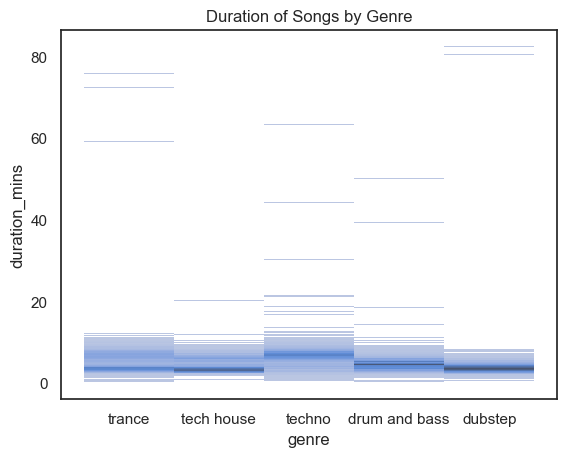

In [154]:
sns.histplot(data=edm_subgenres_balanced, y='duration_mins', x='genre').set(title='Duration of Songs by Genre')

The below density plots show the ditribution of loudness by genre. Tech-house takes the cake with the highest loudness density.

/Users/schenfeldp/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Distribution of Loudness by Genre')

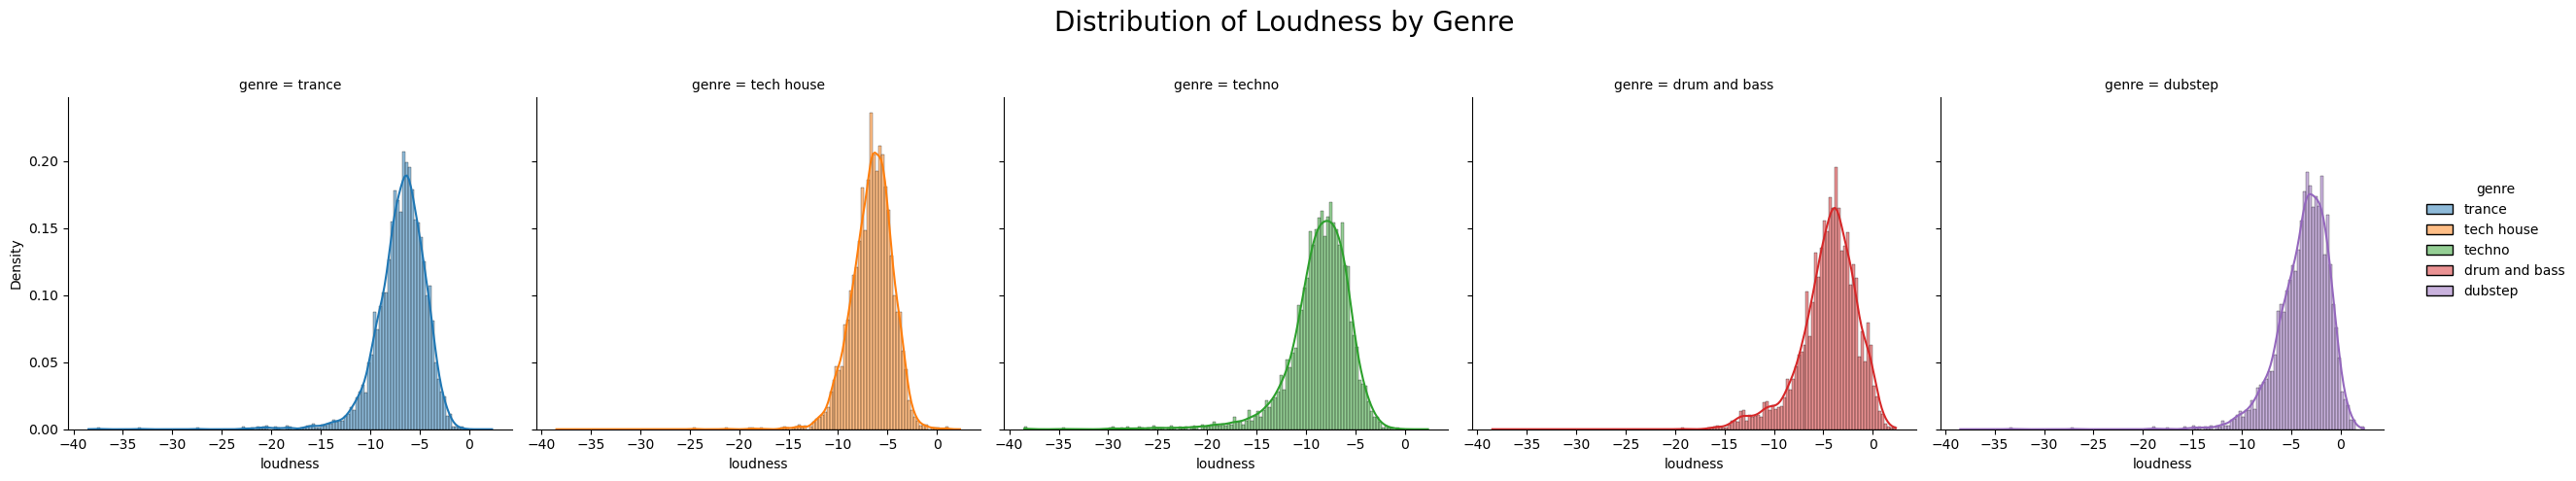

In [ ]:
# DISTRIBUTION PLOT-2
num_cols = 5
g=sns.displot(
    data=edm_subgenres_balanced,
    x="loudness", 
    col="genre",
    hue="genre",
    kde=True,
    stat='density',
    common_norm=False,
    col_wrap=num_cols,
    )
plt.subplots_adjust(top=.8)  # Adjust the top margin for the title
g.fig.suptitle("Distribution of Loudness by Genre", fontsize=20)

Below is a density plot showing the different distributions of tempo for each genre. Most distinctly, drum and bass along with dubstep have the most differing tempo compared to the other genres. Tech-house seems to have a distinct tempo range, with a mean around 125.

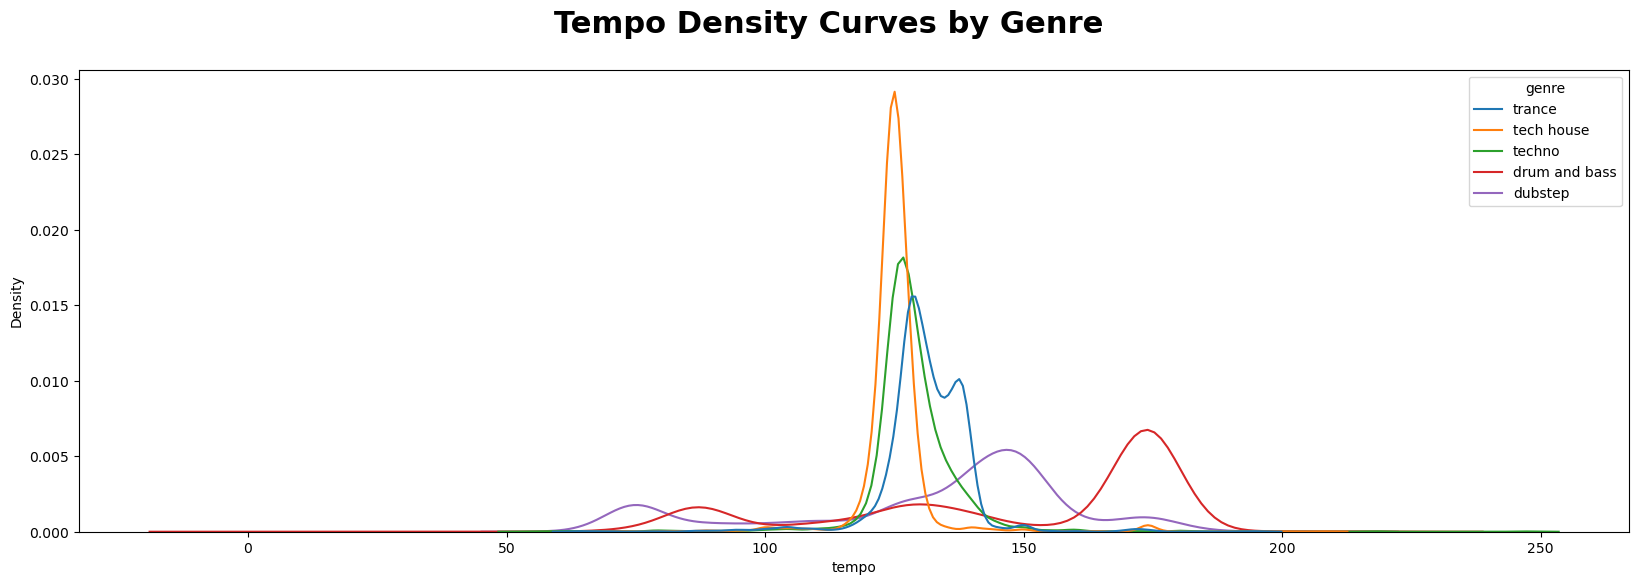

In [ ]:
fig, ax = plt.subplots(figsize=[20, 6])
plt.suptitle('Tempo Density Curves by Genre', fontweight='bold', fontsize=22)
sns.kdeplot(data=edm_subgenres_balanced, x='tempo', hue='genre',  ax=ax)
plt.grid(False)
plt.show();

The boxplot below showing the distribution of daceability for each genre, demonstrates that the most 'danceable' genres are tech-house and techno.

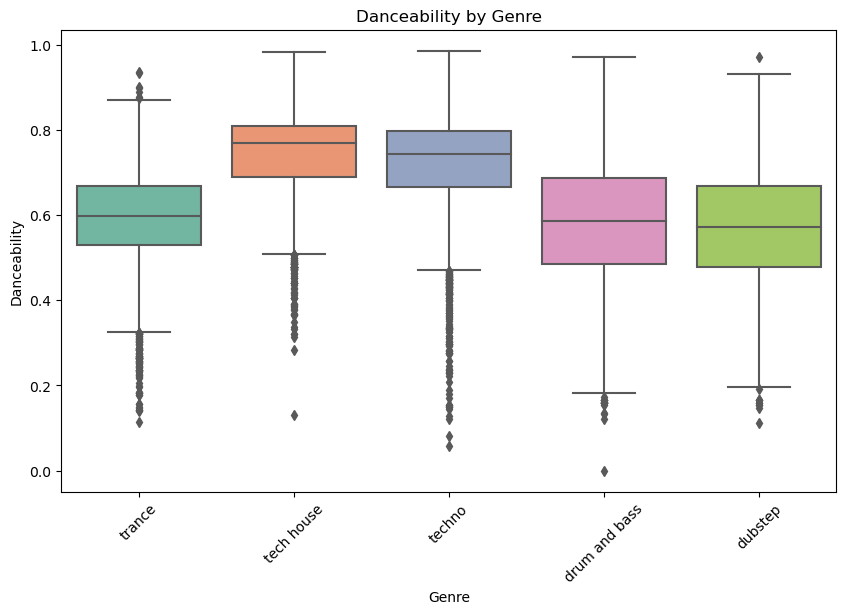

In [ ]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=edm_subgenres_balanced, x="genre", y="danceability", palette="Set2")
plt.title("Danceability by Genre")
plt.xlabel("Genre")
plt.ylabel("Danceability")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

### Correlation Analysis

The highest correlation from this matrix seems to be 'loudness' and 'energy' with a correlation of .59. Additionally, the most negatively correlated columns are 'energy' and 'acousticness', which would make sense because acoustic versions of songs are typically lower in energy.

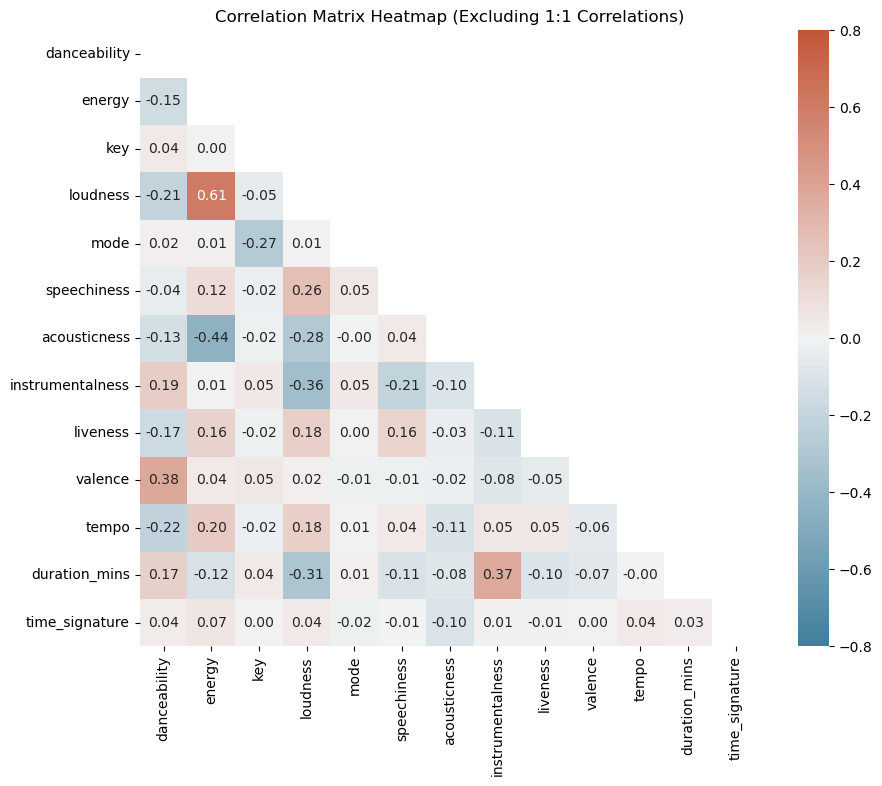

In [ ]:

numeric_columns = edm_subgenres_balanced.select_dtypes(include=np.number)

# Compute the correlation matrix for the selected numeric columns
corr_matrix = numeric_columns.corr()

# Create a mask to hide the upper triangular part (including diagonal)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a custom colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Plot the heatmap with the mask
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=0.8, vmin=-0.8, annot=True, fmt=".2f")

# Set the title
plt.title("Correlation Matrix Heatmap (Excluding 1:1 Correlations)")

# Show the plot
plt.show()


### Hypothesis Generation

* Can we predict edm subgenres using machine learning?

## Spotify Revenues, Expenses & Premium Users

### Data Understanding
**About this dataset:**

Spotify Revenue, Expenses and its Premium Users contains the number of premium users, number of Ad-supported users and total monthly active users (MAUs). The data spans from 2017-2023, with quarterly data.

MAUs include number of premium users as well as number of Ad-supported users.

*Note : Sum of Premium Users and Ad-supported users can have some difference from MAUs.*

*Note : All money figures are in Euro millions except ARPU which is in Euro and as it is.*

*Note : All users figures are in millions.*

**Following definitions:**

MAUs : It is defined as the total count of Ad-Supported Users and Premium Subscribers that have consumed content for greater than zero milliseconds in the last thirty days from the period-end indicated.

Premium MAUs : It is defined as users that have completed registration with Spotify and have activated a payment method for Premium Service.

Ad MAUs : It is defined as the total count of Ad-Supported Users that have consumed content for greater than zero milliseconds in the last thirty days from the period-end indicated.

Premium ARPU : It is average revenue per user which is monthly measure defined as Premium subscription revenue recognized in the quarter indicated divided by the average daily Premium Subscribers in such quarter, which is then divided by three months.

Cost of Revenue : Expenses done by the company.



In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

rcp = pd.read_csv('../../data/clean_data/revenue_costs_premium/revenue_costs_premium.csv')
rcp.date = pd.to_datetime(rcp['date'])

In [71]:
rcp.dtypes

date                               datetime64[ns]
total_revenue                             float64
cost_of_revenue                           float64
gross_profit                              float64
premium_revenue                           float64
premium_cost_revenue                      float64
premium_gross_profit                      float64
ad_revenue                                float64
ad_cost_of_revenue                        float64
ad_gross_profit                           float64
maus                                      float64
premium_maus                              float64
ad_maus                                   float64
premium_arpu                              float64
sales_and_marketing_cost                  float64
research_and_development_cost             float64
general_and_administrative_cost           float64
dtype: object

### Descriptive Statistics

Below is a summary of the statistics of the dataset. This dataset is on the smaller side, with only 25 rows, representing 25 quarters of the year from 2017-2023. Although a small dataset, it would be interesting to see the trends over time. For instance, the lowest revenue recorded was 902 million euros, and the max was 3166 million euros. My instinct would tell me that as Spotify grew over the years, the revenue continued to increase. There are a lot of interesting metrics in this dataset to explore, especially marketing costs. This table gives a broad oversight of our data, which is particularly useful because all of our variables are numerical.

In [72]:
rcp.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
date,25,2020-03-30 21:07:12,2017-03-31 00:00:00,2018-09-30 00:00:00,2020-03-31 00:00:00,2021-09-30 00:00:00,2023-03-31 00:00:00,NaN
total_revenue,25.0,1949.2,902.0,1449.0,1855.0,2501.0,3166.0,688.571468
cost_of_revenue,25.0,1448.32,775.0,1010.0,1381.0,1833.0,2365.0,511.590634
gross_profit,25.0,501.28,105.0,373.0,479.0,668.0,801.0,188.493484
premium_revenue,25.0,1721.4,828.0,1210.0,1700.0,2178.0,2717.0,599.337203
premium_cost_revenue,25.0,1247.04,686.0,894.0,1219.0,1545.0,1939.0,409.621419
premium_gross_profit,25.0,474.36,118.0,316.0,481.0,633.0,778.0,191.566977
ad_revenue,25.0,215.76,74.0,130.0,175.0,282.0,449.0,107.578762
ad_cost_of_revenue,25.0,201.68,87.0,115.0,157.0,286.0,426.0,105.019332
ad_gross_profit,25.0,14.08,-16.0,4.0,18.0,25.0,42.0,15.739864


### Data Visualization

I began by creating a graph of the Premium monthly active users and the Ad monthly active users over time. I was curious to see if there were any trends or periods where MAUs fell. From the below graph, MAUs for both premium and ad-supported users steadily increased from 2017-2023. Premium users seem to be behind in numbers compared to the ad-supported users, this could be an indication of an opportunity to push premium sign-ups.

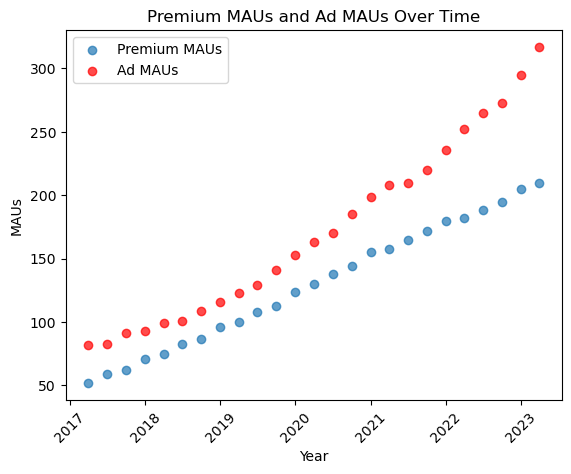

In [77]:
plt.scatter(rcp['date'], rcp['premium_maus'], label='Premium MAUs', alpha=0.7)

# Overlay 'ad_maus' on the same plot
plt.scatter(rcp['date'], rcp['ad_maus'], label='Ad MAUs', alpha=0.7, color='red')
plt.title('Premium MAUs and Ad MAUs Over Time')
plt.xlabel('Year')
plt.ylabel('MAUs')
plt.xticks(rotation=45)
plt.legend()

This graph below shows the gross profit trends for premium and ad users. It is evident that premium users generate more profit (monthly subscription payments from users), whereas ad-supported accounts are free and generate minimal profit.

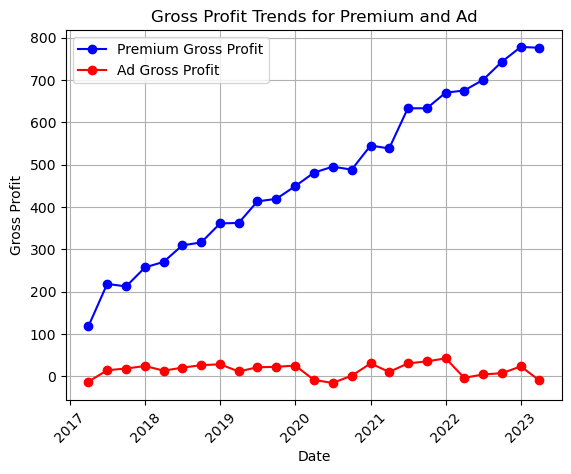

In [78]:
plt.plot(rcp['date'], rcp['premium_gross_profit'], label='Premium Gross Profit', marker='o', linestyle='-', color='blue')

# Plot 'ad_gross_profit' on the same plot
plt.plot(rcp['date'], rcp['ad_gross_profit'], label='Ad Gross Profit', marker='o', linestyle='-', color='red')

plt.title('Gross Profit Trends for Premium and Ad')
plt.xlabel('Date')
plt.ylabel('Gross Profit')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

Below we can see the breakdown of costs from this dataset, which indicatively shows that 'cost_of_revenue' is the most significant cost. 

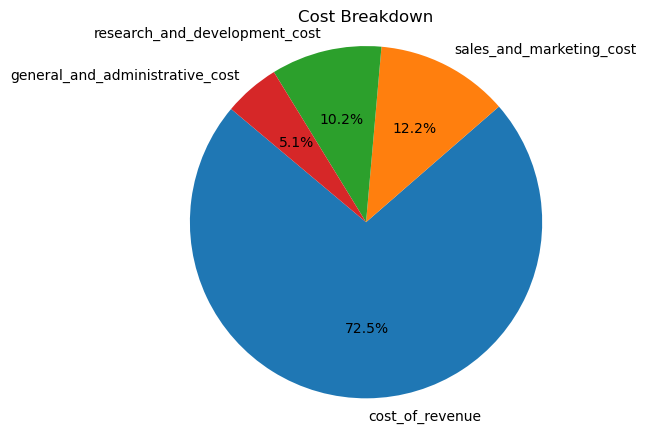

In [82]:
# Calculate the total cost
total_cost = rcp[['cost_of_revenue', 'sales_and_marketing_cost',
                  'research_and_development_cost', 'general_and_administrative_cost']].sum()

# Create a list of cost labels
cost_labels = total_cost.index

# Create a list of cost values
cost_values = total_cost.values

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(cost_values, labels=cost_labels, autopct='%1.1f%%', startangle=140)
plt.title('Cost Breakdown')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

The graph below is very interesting as it plots the number of premium monthly active users over time as well as the premium average revenue per user over time. The number of premium MAUs has steadily increased over time while the premium ARPU has decreased. What attributed to this effect?

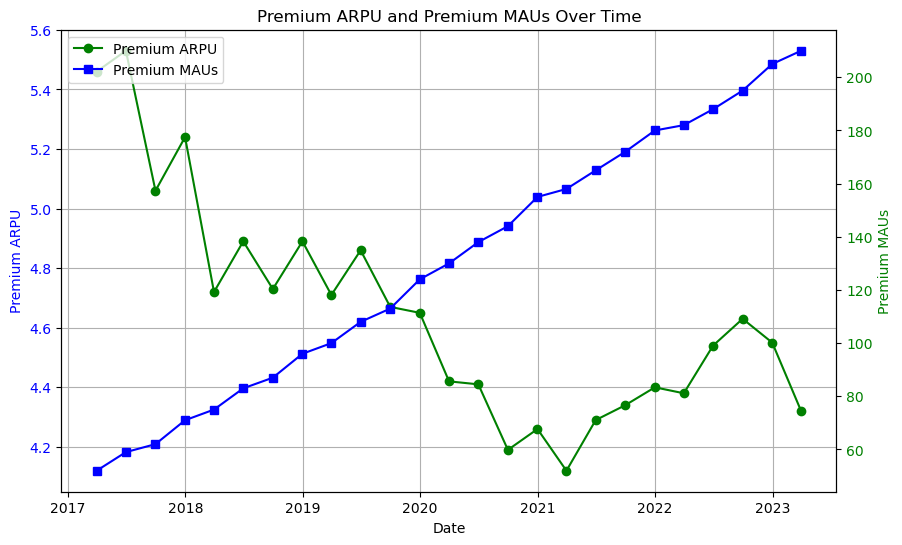

In [83]:
# Create a figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Premium ARPU on the primary y-axis (left)
ax1.plot(rcp['date'], rcp['premium_arpu'], marker='o', linestyle='-', color='green', label='Premium ARPU')
ax1.set_xlabel('Date')
ax1.set_ylabel('Premium ARPU', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Create a secondary y-axis (right)
ax2 = ax1.twinx()

# Plot Premium MAUs on the secondary y-axis (right)
ax2.plot(rcp['date'], rcp['premium_maus'], marker='s', linestyle='-', color='blue', label='Premium MAUs')
ax2.set_ylabel('Premium MAUs', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add legends for both lines
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Title and show the plot
plt.title('Premium ARPU and Premium MAUs Over Time')
plt.xticks(rotation=45)
plt.show()

### Correlation Analysis

The correlation matrix below shows the correlation between the different variables in the dataset. Darker colors represent stronger correlations, while lighter colors represent weaker or no correlations. It appears that most of the variables are almost directly correlated with one another, which would make sense since total_revenue, for example, would be highly correlated with costs and profits.

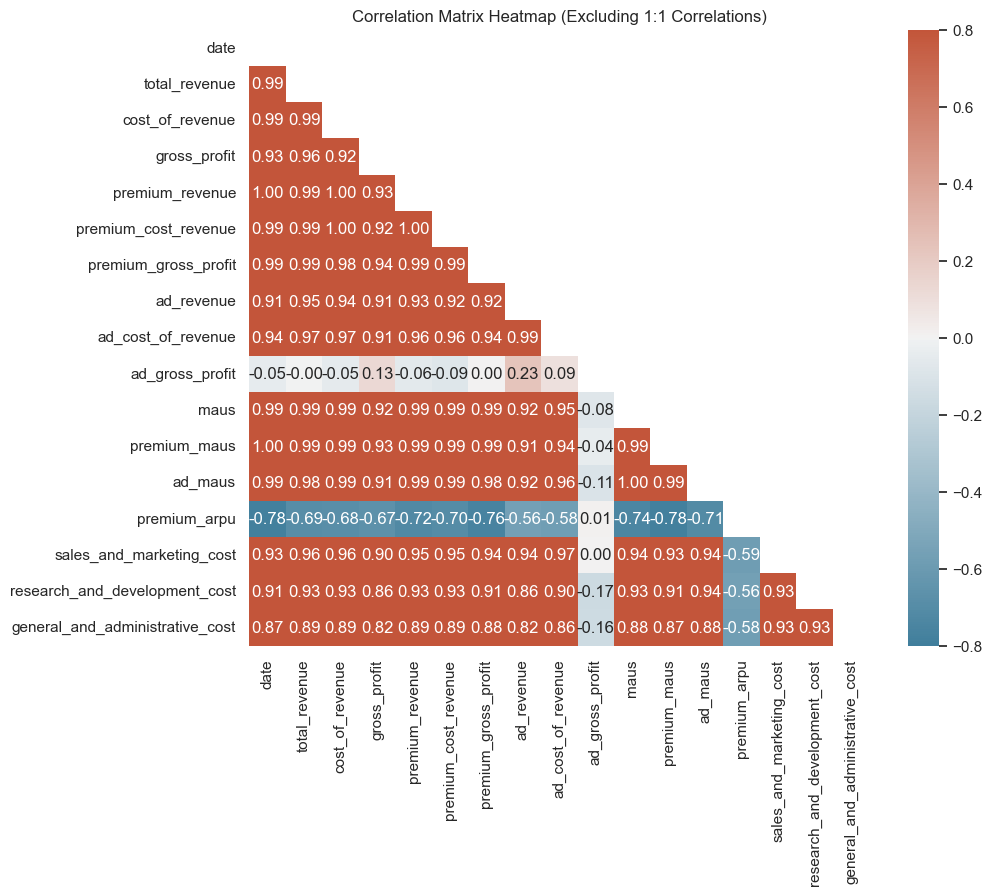

In [92]:
# Compute the correlation matrix
corr_matrix = rcp.corr()

# Create a mask to hide the upper triangular part (including diagonal)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a custom colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Plot the heatmap with the mask
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=0.8, vmin=-0.8, annot=True, fmt=".2f")

# Set the title
plt.title("Correlation Matrix Heatmap (Excluding 1:1 Correlations)")

# Show the plot
plt.show()

### Hypothesis Generation
Based on my initial observations from the data, I would like to refine my research questions to the following:

* Based on historical data, can you create forecasts for future revenue, user engagement, or expenses?
* How do marketing and development expenses correlate with changes in revenue and user engagement?
* How do cost components change over time, and are there any cost-saving opportunities?

## Spotify User Behavior

### Understanding the Data
Below are definitions of the columns in this dataset.

1) Age - Age group of user

2) Gender - Gender of user

3) spotify_usage_period - How long have you been using Spotify?

4) spotify_listening_device - Which of the following devices do you primarily use to listen to Spotify?

5) spotify_subscription_plan - Which Spotify subscription plan do you currently have?

6) premium_sub_willingness - Are you willing to take a premium subscription or willing to continue with premium subscription in future?

7) preffered_premium_plan - If premium or willing to take premium, what amount do you pay for the subscription?

8) preferred_listening_content - What do you prefer to listen more?

9) fav_music_genre - What genre(s) of music do you enjoy the most?

10) music_time_slot - What is your favourite time slot to listen to music?

11) music_Influencial_mood - When it comes to listening to music, which of the following moods or situations most strongly influences your choice of music?

12) music_lis_frequency - When do you listen to music more often?

13) music_expl_method - How do you discover new music on Spotify?

14) music_recc_rating - How do you rate the spotify music recommendations from 1-5?

15) pod_lis_frequency - How often do you listen to Podcast?

16) fav_pod_genre - What genre(s) of Podcast do you enjoy the most?

17) preffered_pod_format - What podcast format you generally prefer?

18) pod_host_preference - Are you more inclined to listen to podcasts from unknown personalities, or do you prefer podcasts hosted by well-known individuals?

19) preffered_pod_duration - Do you prefer shorter podcast episodes (under 30 minutes) or longer episodes (over 30 minutes)

20) pod_variety_satisfaction - Are you satisfied with the variety and availability of podcasts on Spotify?

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

user_behavior = pd.read_csv('../../data/clean_data/spotify_user_behavior/spotify_user_behavior.csv')

In [97]:
user_behavior.dtypes

age                            object
gender                         object
spotify_usage_period           object
spotify_listening_device       object
spotify_subscription_plan      object
premium_sub_willingness        object
preferred_premium_plan         object
preferred_listening_content    object
fav_music_genre                object
music_time_slot                object
music_influential_mood         object
music_lis_frequency            object
music_expl_method              object
music_rec_rating                int64
pod_lis_frequency              object
fav_pod_genre                  object
preferred_pod_format           object
pod_host_preference            object
preferred_pod_duration         object
pod_variety_satisfaction       object
dtype: object

### Descriptive Statistics

We only have one numerical variable in our dataset so the below table shows the statistics for that column. It appears that the average rating for the Spotify recommendation system is 3.5 out of 5, which I would say is a favorable score overall.

In [100]:
user_behavior.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
music_rec_rating,520.0,3.503846,0.979552,1.0,3.0,3.5,4.0,5.0


### Data Visualizations

Below is a graph showing the distribution of gender within the dataset. Within the 520 rows, there are over 350 responses from females, and only around 100 from males. The data is heavily skewed towards women.

[Text(0.5, 1.0, 'Count of Gender')]

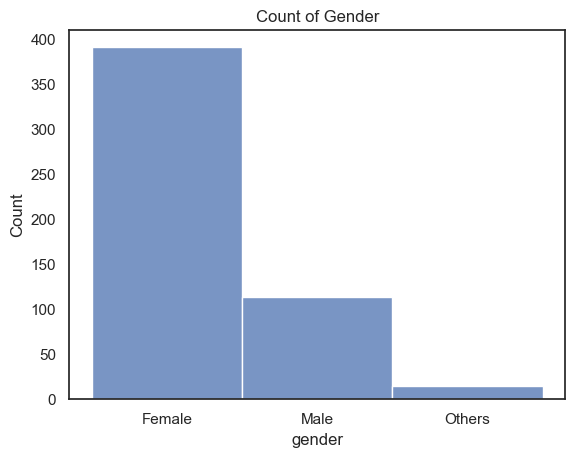

In [101]:
sns.histplot(user_behavior.gender).set(title='Count of Gender')

Here we can see that the dataset is mostly comprised of users within the age range of 20-35. It is intuitive that there would be little to no users between the ages of 6-12 and over 60 years old. Although this dataset only contains 520 rows, I would believe it is likely that in general 20-35 is the most active age group on the platform.

[Text(0.5, 1.0, 'Distribution of Age Ranges')]

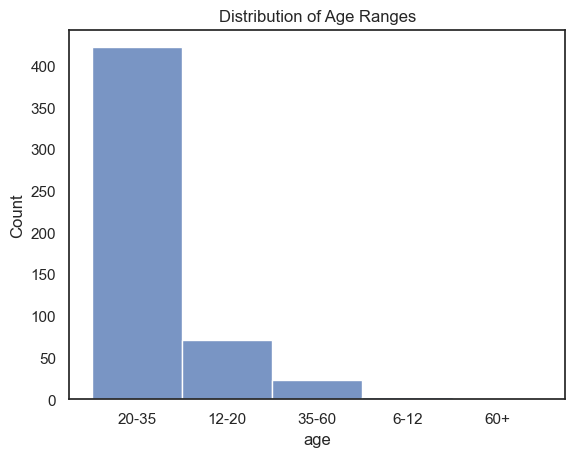

In [102]:
sns.histplot(user_behavior.age).set(title='Distribution of Age Ranges')

This pie chart shows the breakdown of how long the users in this dataset have been using Spotify. It is a good sign that most users have been on the platform for more than 2 years. This shows great retention rate.

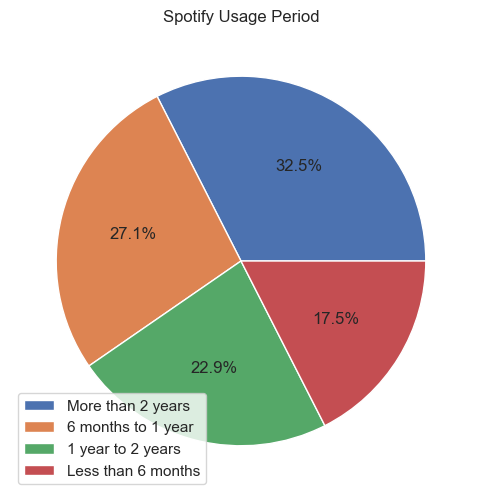

In [103]:
labels = ['More than 2 years', '6 months to 1 year', '1 year to 2 years','Less than 6 months']
x = user_behavior['spotify_usage_period'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(x,autopct='%1.1f%%')
plt.title('Spotify Usage Period')
plt.legend(labels, loc='best')
plt.show()

From the below pie chart, it is evident that there is a lack of podcast listening within these group of listeners. The frequenices of 'Never' and 'Rarely make up 63.7% of the data! This could potentially be a good opportunity for Spotify to work on its reach of podcast listeners.

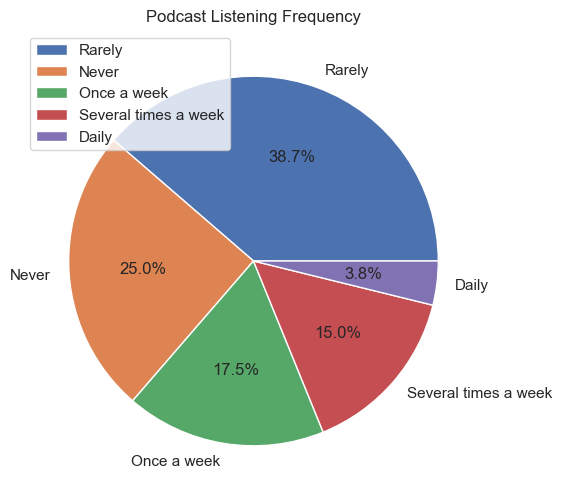

In [106]:
x = user_behavior['pod_lis_frequency'].value_counts()
labels=['Rarely','Never','Once a week','Several times a week','Daily']
fig,ax=plt.subplots(figsize=(8,6))
plt.pie(x,labels=labels,autopct='%1.1f%%')
plt.legend(loc='upper left')
plt.title('Podcast Listening Frequency')
plt.show()

This horizantal bar chart shows the distribution of what the favorite podcast genres are. Comedy and Lifestyle/Health are the top 2 most popular genres. Marketing these podcasts towards users could increase podcast listening rates.

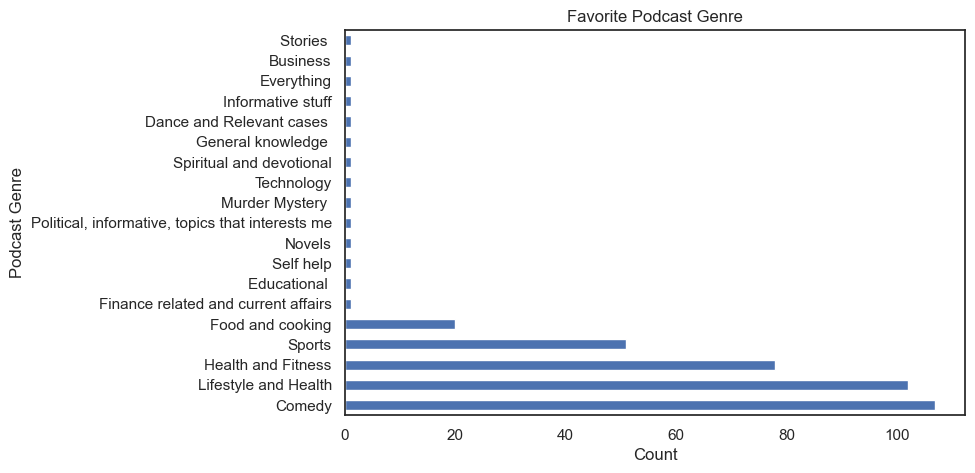

In [105]:
# Count the unique values in the 'fav_pod_genre' column
genre_counts = user_behavior['fav_pod_genre'].value_counts()

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(8, 5))
genre_counts.plot(kind='barh', color='b', ax=ax)
ax.set_xlabel('Count')
ax.set_ylabel('Podcast Genre')
ax.set_title('Favorite Podcast Genre')
plt.show()


### Correlation Analysis
Due to not having numeric values in this dataset, I did not create a correlation matrix. However, the graphs below may indicate some correlation between variables.

This graph shows the distribution of favorite genres and what time slot they are most preferred for listening. The 'Melody' genre is most preferred to be listened at night, as well as the 'Pop' genre. The time of day may affect what genre is listened to.

[Text(0.5, 1.0, 'Which Genre is Most Preferred at What Time Slot')]

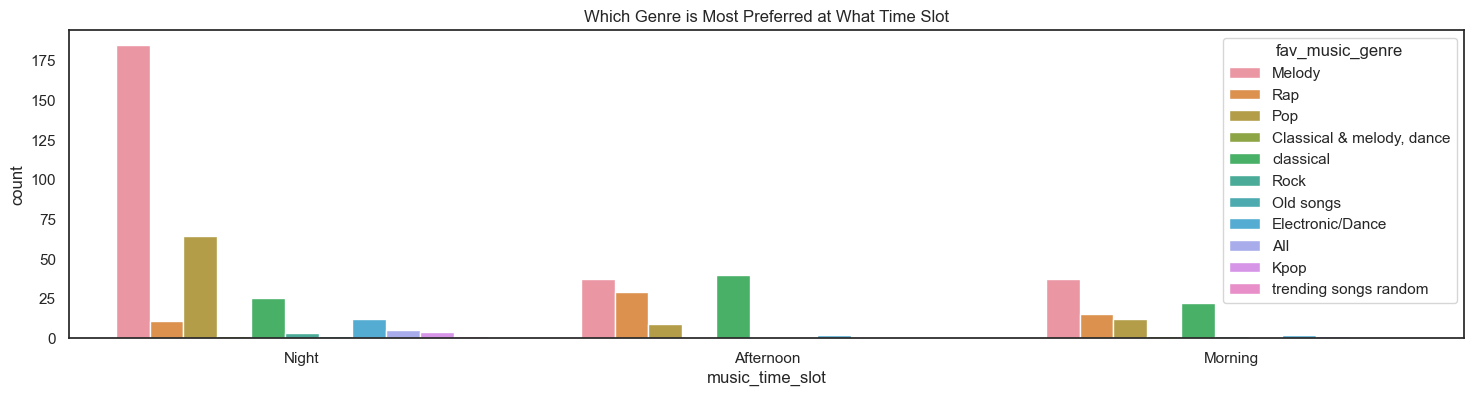

In [109]:
fig, ax = plt.subplots(figsize=(18, 4))
sns.countplot(x='music_time_slot',data=user_behavior,hue='fav_music_genre').set(title="Which Genre is Most Preferred at What Time Slot")

This histogram shows a user's willigness to change to a premium plan according to their age group. While we already know the age range of 20-35 is most abundant in this dataset, it is also evident they are more likely to switch to premium. 

[Text(0.5, 1.0, 'Willingness to Change to Premium According to Age Group')]

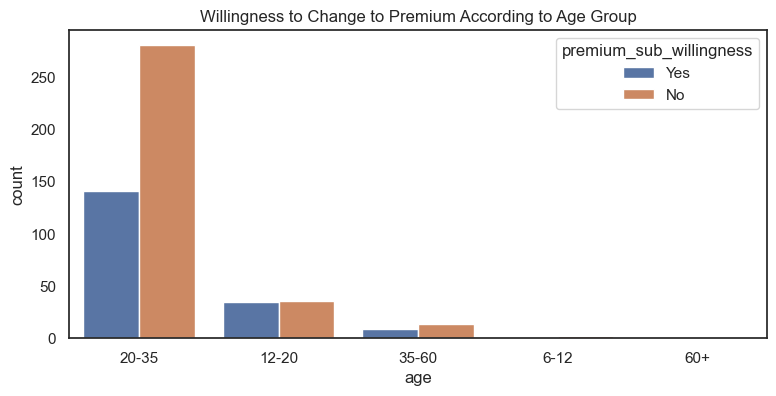

In [108]:
fig, ax = plt.subplots(figsize=(9, 4))
sns.countplot(x='age',data=user_behavior,hue='premium_sub_willingness').set(title="Willingness to Change to Premium According to Age Group")

### Hypothesis Generation
Based on my EDA, I would refine my research questions to the following:

* Which Premium plan is preferred by users, and does it vary by age or music preferences?
* How can Spotify tailor its marketing and content strategy to better cater to the preferences and behavior of different user segments?
* Can personalized music or podcast recommendations be generated based on user preferences and behavior?